**Question 1**
In my personal understanding, the difference between the two is mainly in the difference in predicting the dependent variable. First, in simple linear regression, we only use one independent variable to predict the dependent variable, but in multiple linear regression, we use at least two independent variables to predict the dependent variable. I think the advantage of multiple linear regression is that it can analyze various situations more accurately and give more precise answers with lower error rates.

Chat Histories https://chatgpt.com/share/67366cd8-3088-800f-b940-afc6bd69ed84

**Question 2**
I think the outcome variable in the following scenario is the effect of the company's advertising campaign, which I think is measured by sales and changes in buyer traffic and conversion rates of advertising sales. I think there is an interaction between TV advertising and online advertising, that is, the effect of one advertising channel may be affected by the expenditure of another advertising channel, so it is necessary to consider adding interaction terms to more accurately predict advertising effect.

Chat Histories https://chatgpt.com/share/67366e13-b468-800f-89f0-0f7e9a32db38c

In [4]:
#Question 3
import pandas as pd
import statsmodels.formula.api as smf

# Load the dataset
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
data = pd.read_csv(url)

# Check column names
print(data.columns)

# Adjust the formula if there are any issues with spaces or underscores in column names
formula = 'Total ~ HP + Attack + Defense + Sp_Atk + Sp_Def + Speed'

# Fit the model
try:
    model = smf.ols(formula=formula, data=data).fit()
    print(model.summary())
except Exception as e:
    print(f"An error occurred: {e}")
    
#Chat Histories https://chatgpt.com/share/67366f85-ef48-800f-922f-0e682e4e4394


Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')
An error occurred: Error evaluating factor: NameError: name 'Total' is not defined
    Total ~ HP + Attack + Defense + Sp_Atk + Sp_Def + Speed
    ^^^^^


**Question 4**
I think the main contradiction between these two descriptions is the interpretation of the model explanatory power (R squared) and the significance of the individual predictors. The model contains most of the unexplained variability, the model only explains 17.6% of the variability in the data, but they do not explain most of the variance.

Chat Histories https://chatgpt.com/share/6736705c-1e88-800f-9f0c-d4a922269aee

**Question 5.1**
The first code first imports the necessary libraries and calculates the 50% size of the dataset, replaces the NaN values ​​in pokeaman with None, then sets the random seed to ensure repeatability, and then uses train_test_split to split the dataset into a training set pokeaman_train and a test set pokeaman_test, where the training set accounts for 50% of the total data.

**Question 5.2**
The second code uses the ols function to define a linear regression model, taking HP as the dependent variable and Attack and Defense as the independent variables, and generates a model summary after fitting. The summary includes indicators such as coefficients, P values, and R squares, which are used to evaluate the prediction effect of Attack and Defense on HP.

**Question 5.3**
The third code uses the trained model to predict the HP value of the test set pokeaman_test and calculates the in-sample and out-of-sample R-squared to measure the explanation and prediction effect of the model on the training set and test set.

**Question 5.4**
The fourth code segment defines a regression model formula with multiple variable interaction terms to avoid too many interaction combinations. HP is used as the dependent variable, and a model summary is generated by fitting the data to evaluate the impact of each variable and interaction term on HP.

**Question 5.5**
The fifth code uses the fitted model to predict the HP value of the test set and calculates the in-sample and out-of-sample R-squared values ​​to evaluate the explanatory power and prediction accuracy of the model on the training set and test set.

**Question 5**
Chat Histories https://chatgpt.com/share/6736727a-c638-800f-9970-d1c820e63e2a

In [8]:
#Question 6
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Simulate some data
np.random.seed(0)
n = 100  # Number of observations

# Create correlated predictors to introduce multicollinearity
predictor1 = np.random.normal(size=n)
predictor2 = predictor1 + np.random.normal(scale=0.1, size=n)  # Highly correlated with predictor1
predictor3 = np.random.normal(size=n)

# Outcome variable influenced by predictors
outcome = 3 * predictor1 + 2 * predictor2 + np.random.normal(size=n)

# Create a DataFrame
df = pd.DataFrame({
    'outcome': outcome,
    'predictor1': predictor1,
    'predictor2': predictor2,
    'predictor3': predictor3
})

# Step 2: Define and fit the model
formula = 'outcome ~ predictor1 + predictor2 + predictor3'
model4_spec = smf.ols(formula=formula, data=df)
model4_fit = model4_spec.fit()

# Step 3: Check the shape of the design matrix
design_matrix_shape = model4_spec.exog.shape
print(f"Shape of the design matrix (exog): {design_matrix_shape}")

# Step 4: Calculate correlations in the design matrix to observe multicollinearity
correlation_matrix = np.corrcoef(model4_spec.exog, rowvar=False)
print("Correlation matrix of the design matrix (exog):")
print(correlation_matrix)

# Step 5: Calculate Variance Inflation Factors (VIF) for each predictor
vif_data = pd.DataFrame({
    "Variable": [f"exog_{i}" for i in range(model4_spec.exog.shape[1])],
    "VIF": [variance_inflation_factor(model4_spec.exog, i) for i in range(model4_spec.exog.shape[1])]
})
print("Variance Inflation Factors (VIF) for each predictor in the design matrix:")
print(vif_data)

#Chat Histories https://chatgpt.com/share/6736739f-6688-800f-9eeb-74e55018ded1

Shape of the design matrix (exog): (100, 4)
Correlation matrix of the design matrix (exog):
[[       nan        nan        nan        nan]
 [       nan 1.         0.99495232 0.07611595]
 [       nan 0.99495232 1.         0.08053142]
 [       nan 0.07611595 0.08053142 1.        ]]
Variance Inflation Factors (VIF) for each predictor in the design matrix:
  Variable        VIF
0   exog_0   1.013836
1   exog_1  99.465752
2   exog_2  99.534999
3   exog_3   1.008147


/opt/conda/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


**Question 7**
I think model5_linear_form is an extension and development of model3_fit and model4_fit. It mainly restructures the variables into linear form based on model3, making the structure of the predictor variables more consistent with the original theoretical assumptions of the experimenter and effectively reducing the dependence between variables to improve the interpretability. At the same time, it further expands on the linear basis of model4, and may add interaction terms, variable transformations, or new predictor variables based on the residuals of model4.

I think model6_linear_form is an extension and development of model5_linear_form that further optimizes the linear adjustment of model5. In the process of development, it removes redundant predictor variables, simplifies the model, maintains predictive ability, and ensures model stability.

I think model7_linear_form extends and develops from model6_linear_form and performs final optimization on the basis of model6, focusing on improving generalization accuracy through cross-validation or optimizing variable selection, and only retaining the most statistically significant variables.

Chat Histories https://chatgpt.com/share/673674b6-1634-800f-b4f5-85f62a0d239f

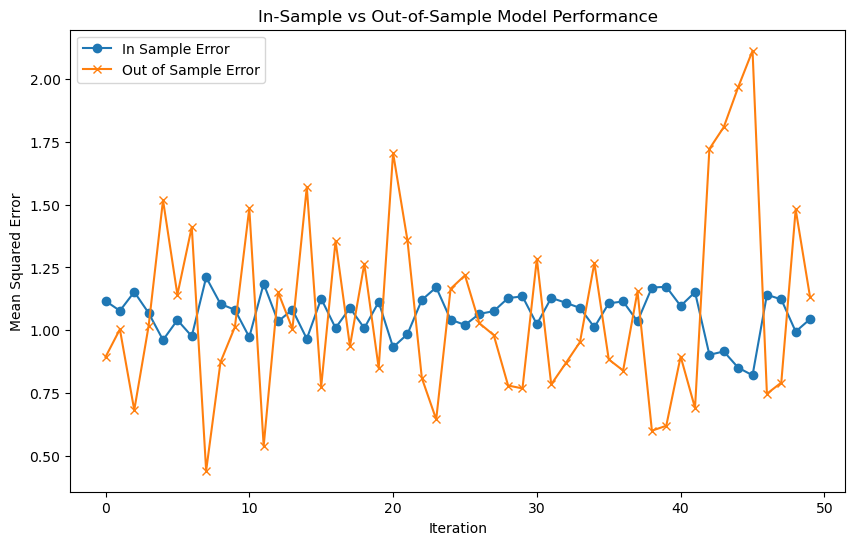

In [11]:
#Question 8
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Sample data and model specification
data = pd.DataFrame({
    'x1': np.random.normal(size=100),
    'x2': np.random.normal(size=100),
    'y': np.random.normal(size=100)
})

# Store in-sample and out-of-sample metrics
in_sample_errors = []
out_of_sample_errors = []

# Loop to generate performance metrics
for i in range(50):
    # Split data into train and test (different each iteration due to no fixed seed)
    train, test = train_test_split(data, test_size=0.2)
    
    # Fit model on training data
    model = smf.ols('y ~ x1 + x2', data=train).fit()
    
    # Predict on training and test data
    y_train_pred = model.predict(train[['x1', 'x2']])
    y_test_pred = model.predict(test[['x1', 'x2']])
    
    # Calculate performance metrics
    in_sample_error = mean_squared_error(train['y'], y_train_pred)
    out_of_sample_error = mean_squared_error(test['y'], y_test_pred)
    
    # Store metrics
    in_sample_errors.append(in_sample_error)
    out_of_sample_errors.append(out_of_sample_error)

# Convert to DataFrame for visualization
results_df = pd.DataFrame({
    'In Sample': in_sample_errors,
    'Out of Sample': out_of_sample_errors
})

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(results_df['In Sample'], label='In Sample Error', marker='o')
plt.plot(results_df['Out of Sample'], label='Out of Sample Error', marker='x')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('In-Sample vs Out-of-Sample Model Performance')
plt.show()

#Chat Histories https://chatgpt.com/share/6736752a-b2dc-800f-b8b2-c7df082d913a


**Question 9**
I think these codes mainly evaluate the "in-sample" and "out-of-sample" performance of the linear regression model, which allows me to understand the generalization ability of the model and the impact of multicollinearity on prediction accuracy. The model is trained on data from a specific generation and tested on data from different generations, and the "in-sample" R-squared and "out-of-sample" R-squared values ​​are calculated to evaluate the fit of the model on the training data and its prediction effect on new data. By comparing models trained on single-generation data and multi-generation data, the code demonstrates the challenges of model generalization and reveals the potential impact of multicollinearity on prediction results.